In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [10, 11]}, font_scale=1.3)

In [2]:
df = pd.read_csv('College_Data.csv')
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
df = pd.get_dummies(df , columns=['Private'],drop_first=True)

In [4]:
df.drop('University',axis=1,inplace=True)

In [5]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaler = scaler.fit_transform(df)

# Cluster _ Hierarchical

In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

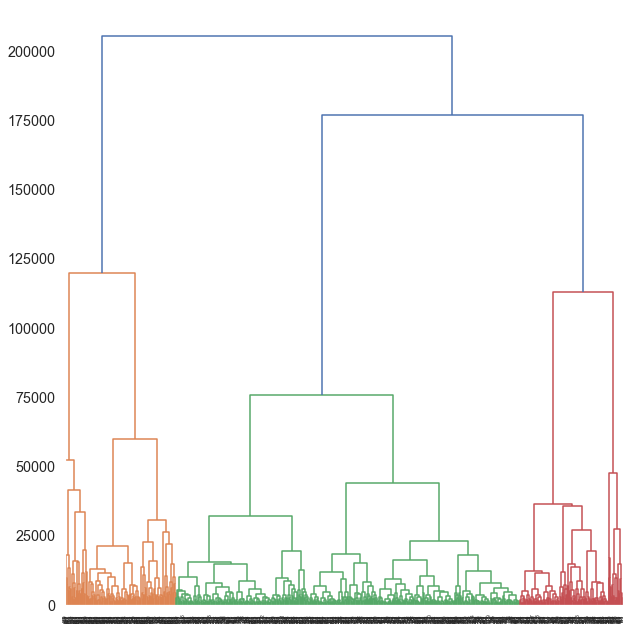

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [9]:
model = AgglomerativeClustering(n_clusters=40)
cluster = model.fit_predict(df_scaler)
cluster

array([39, 13, 20,  0, 30, 38, 19, 22, 22, 13,  3, 22, 21, 22, 31, 27,  0,
       20, 30,  9, 12, 35, 38, 14, 19, 17, 25, 11,  1, 22, 38, 22, 10, 38,
       21, 38, 16, 16, 27,  7, 19, 21, 27, 39, 22, 17, 36,  1, 25, 39, 38,
       38, 30, 13, 22, 10,  7, 10, 30, 15, 18, 11,  1, 18, 16,  1, 30, 20,
       21,  8, 26,  0, 16, 38, 19,  1, 19, 21, 11, 11, 21, 10, 10, 19, 21,
       13,  0, 16, 19, 20, 19, 16,  6, 38,  3, 20,  3, 20,  1, 19, 32, 22,
        9, 35,  6, 36,  0,  1,  3, 21, 19, 38,  9, 30,  0, 22, 38, 25, 11,
        9, 19, 38, 16, 16, 21,  7, 20,  3, 27, 21, 22, 38, 38, 19, 36, 20,
       38,  0, 24, 22,  0, 11, 30, 21, 26, 30, 30, 39, 38, 16, 38, 22,  3,
       20, 20, 10, 20,  1, 26,  0, 30, 17, 22, 22,  3, 17, 39, 38, 13, 31,
       30, 19, 16, 19, 26, 22, 11,  7, 10, 20,  6, 35, 20, 20, 22, 21, 19,
       38, 10, 13, 21, 26,  9, 22, 38,  6, 25,  9, 30, 10, 37,  5,  1,  8,
       20, 25,  9,  9, 36, 38, 13, 10, 39, 22, 20, 30,  1, 20,  9,  4, 39,
       26, 24,  5, 20, 16

In [10]:
df['Cluster'] = cluster
df

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes,Cluster
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,39
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,13
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,20
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,0
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,9
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,21
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,39
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,26
